# **Wine Dataset ML practice**

This notebook will use the dataset from [here](http://archive.ics.uci.edu/ml/datasets/Wine).

This is a multilabel classification problem. Some info from the webpage are below.

## Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.


## Attribute Information:

All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)

NOTE: 1st attribute is class identifier (1-3)

In [21]:
# import modules and set global settings
# suppress warnings for the notebook
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = "wtype,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,tot_phenols,flavonoids,nonflavonoids,proanthocyanins,color,hue,OD280/OD315,proline"
names = col_names.split(",")
dataset = pd.read_csv(filename, names=names)

In [23]:
# inspect dataset

print("# shape")
print(dataset.shape)

pd.set_option('display.max_columns', None)
print("\n# peek the data")
print(dataset.head(20))

print("\n# description")
print(dataset.describe())

print("\n# class distribution")
print(dataset.groupby('wtype').size())

# shape
(178, 14)

# peek the data
    wtype  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
5       1    14.20        1.76  2.45               15.2        112   
6       1    14.39        1.87  2.45               14.6         96   
7       1    14.06        2.15  2.61               17.6        121   
8       1    14.83        1.64  2.17               14.0         97   
9       1    13.86        1.35  2.27               16.0         98   
10      1    14.10        2.16  2.30               18.0        105   
11      1    14.12        1.48  2.32               16.8         95   
12      1    13.75        1.73  2.41               16.0

# box and whisker plots


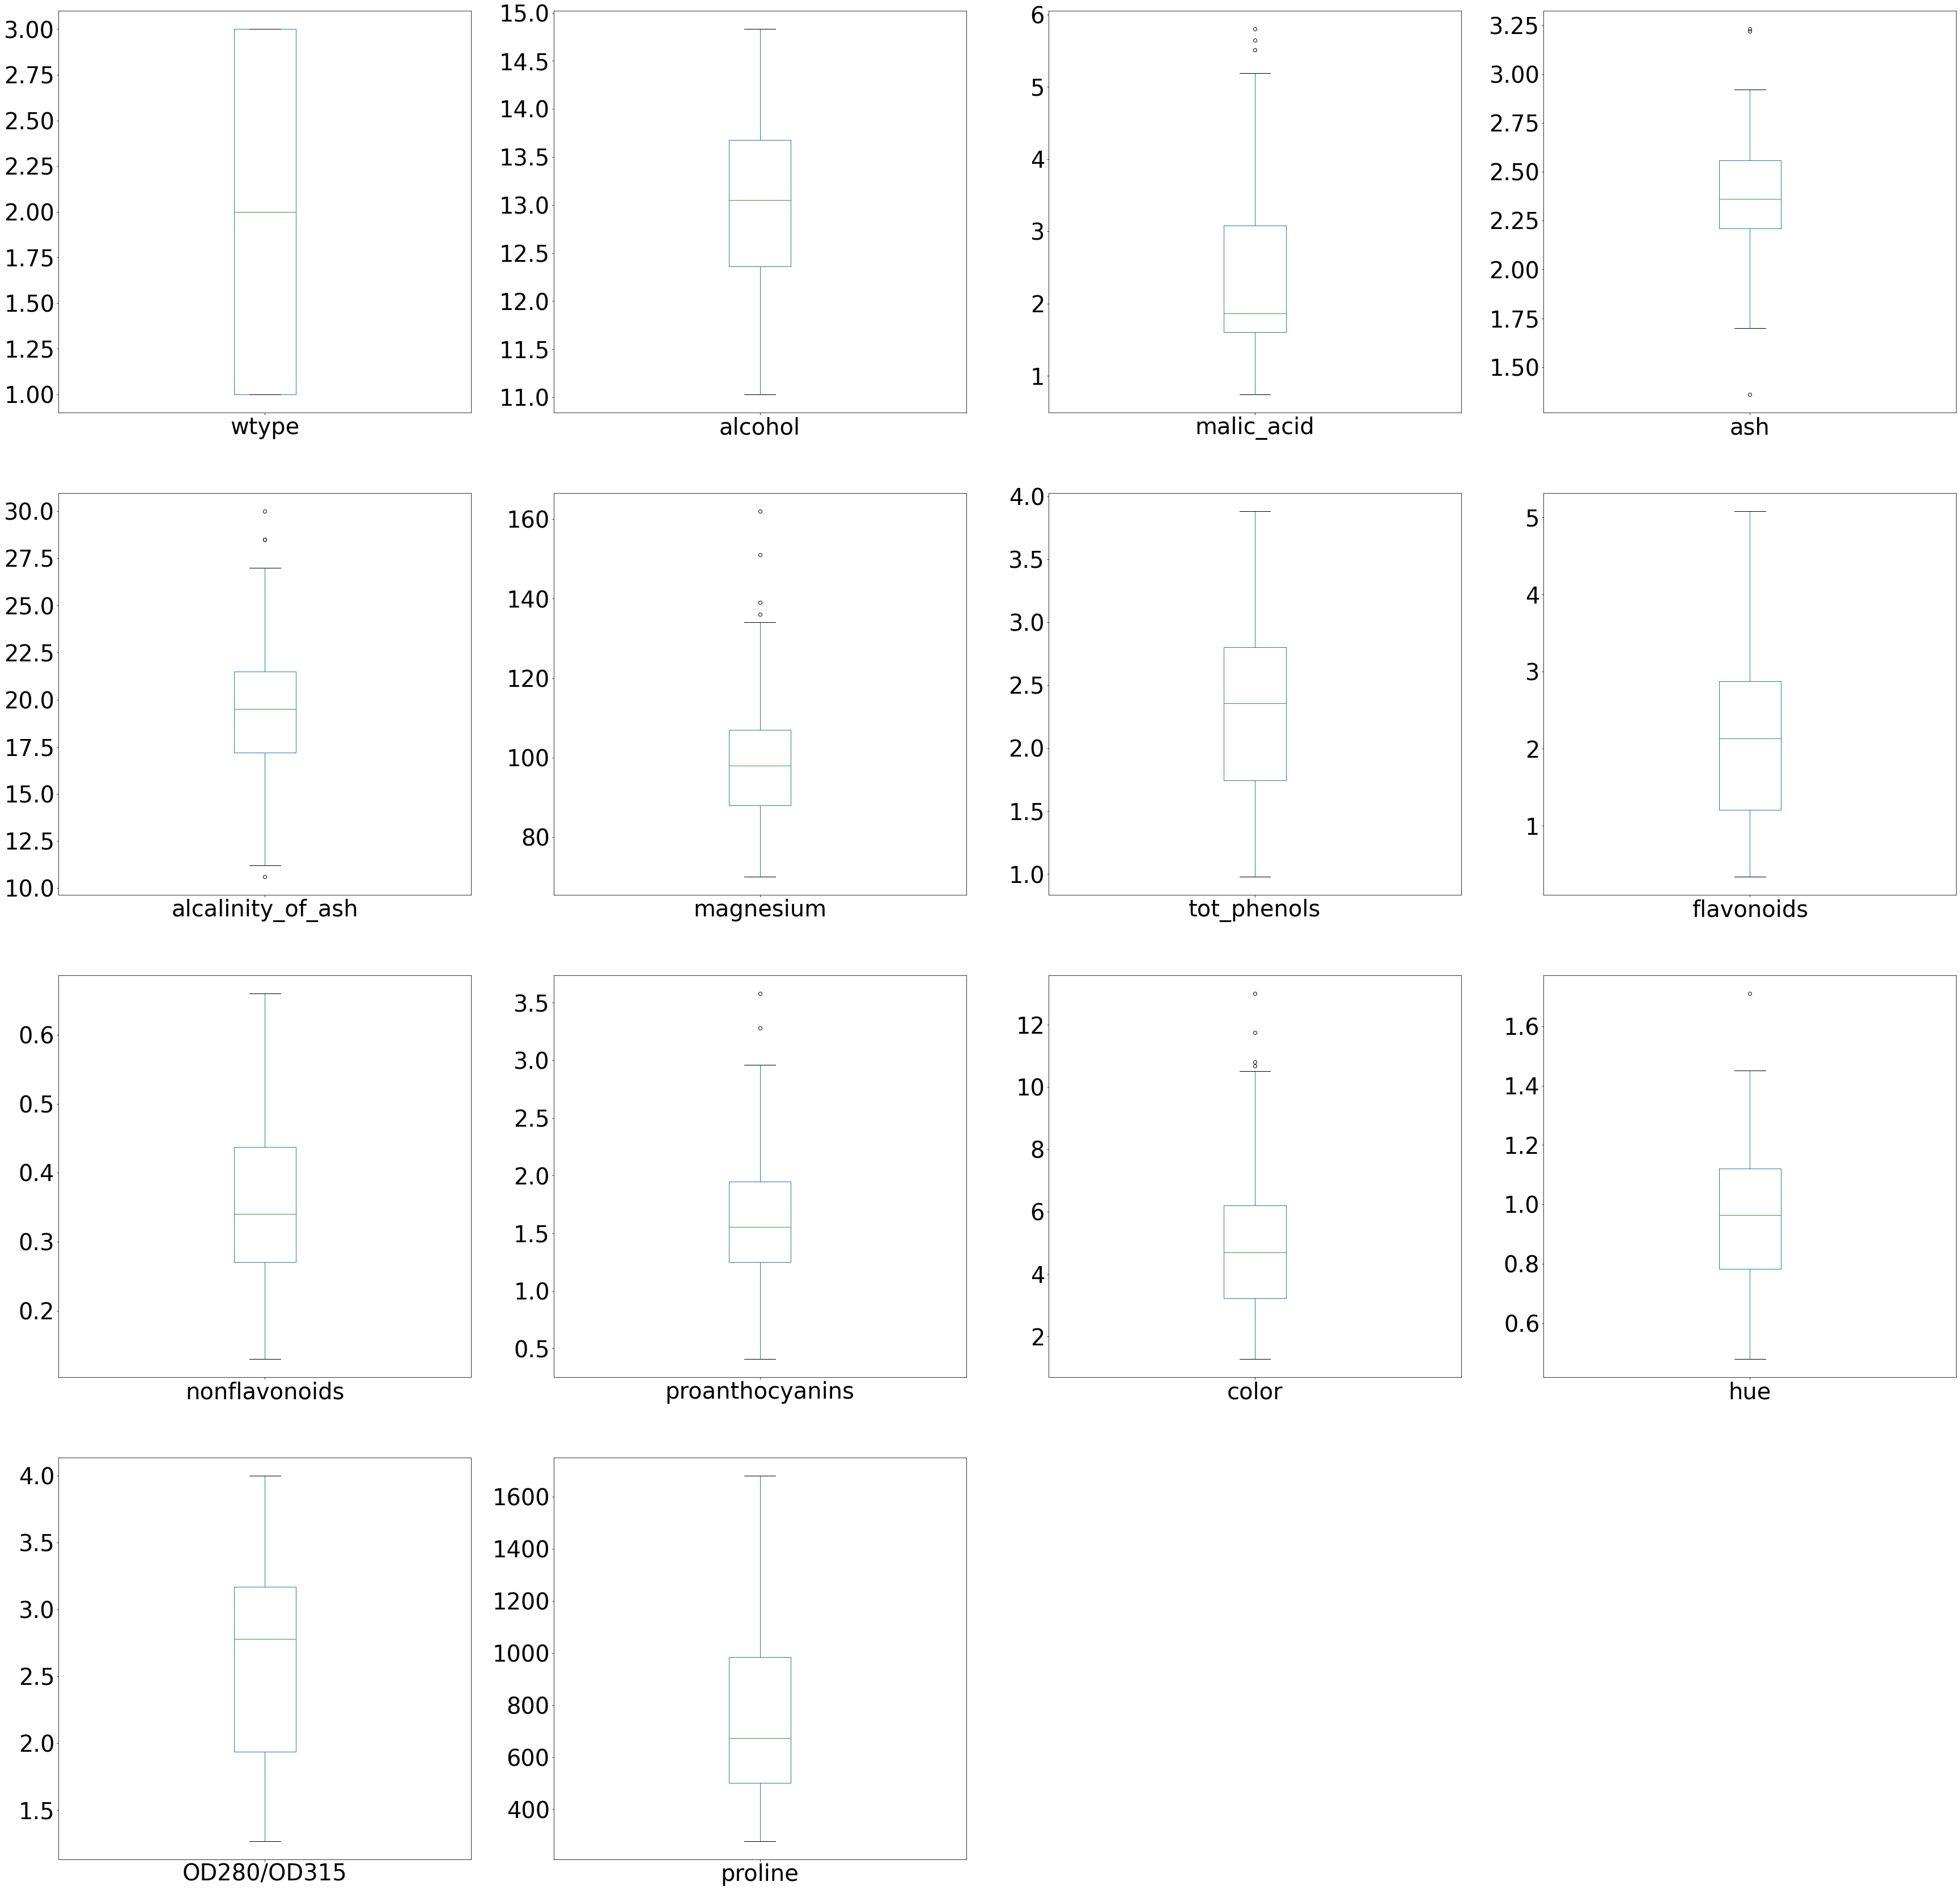

In [24]:
print("# box and whisker plots")

dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
             figsize=(60,60), fontsize=40)
plt.show()

# histograms


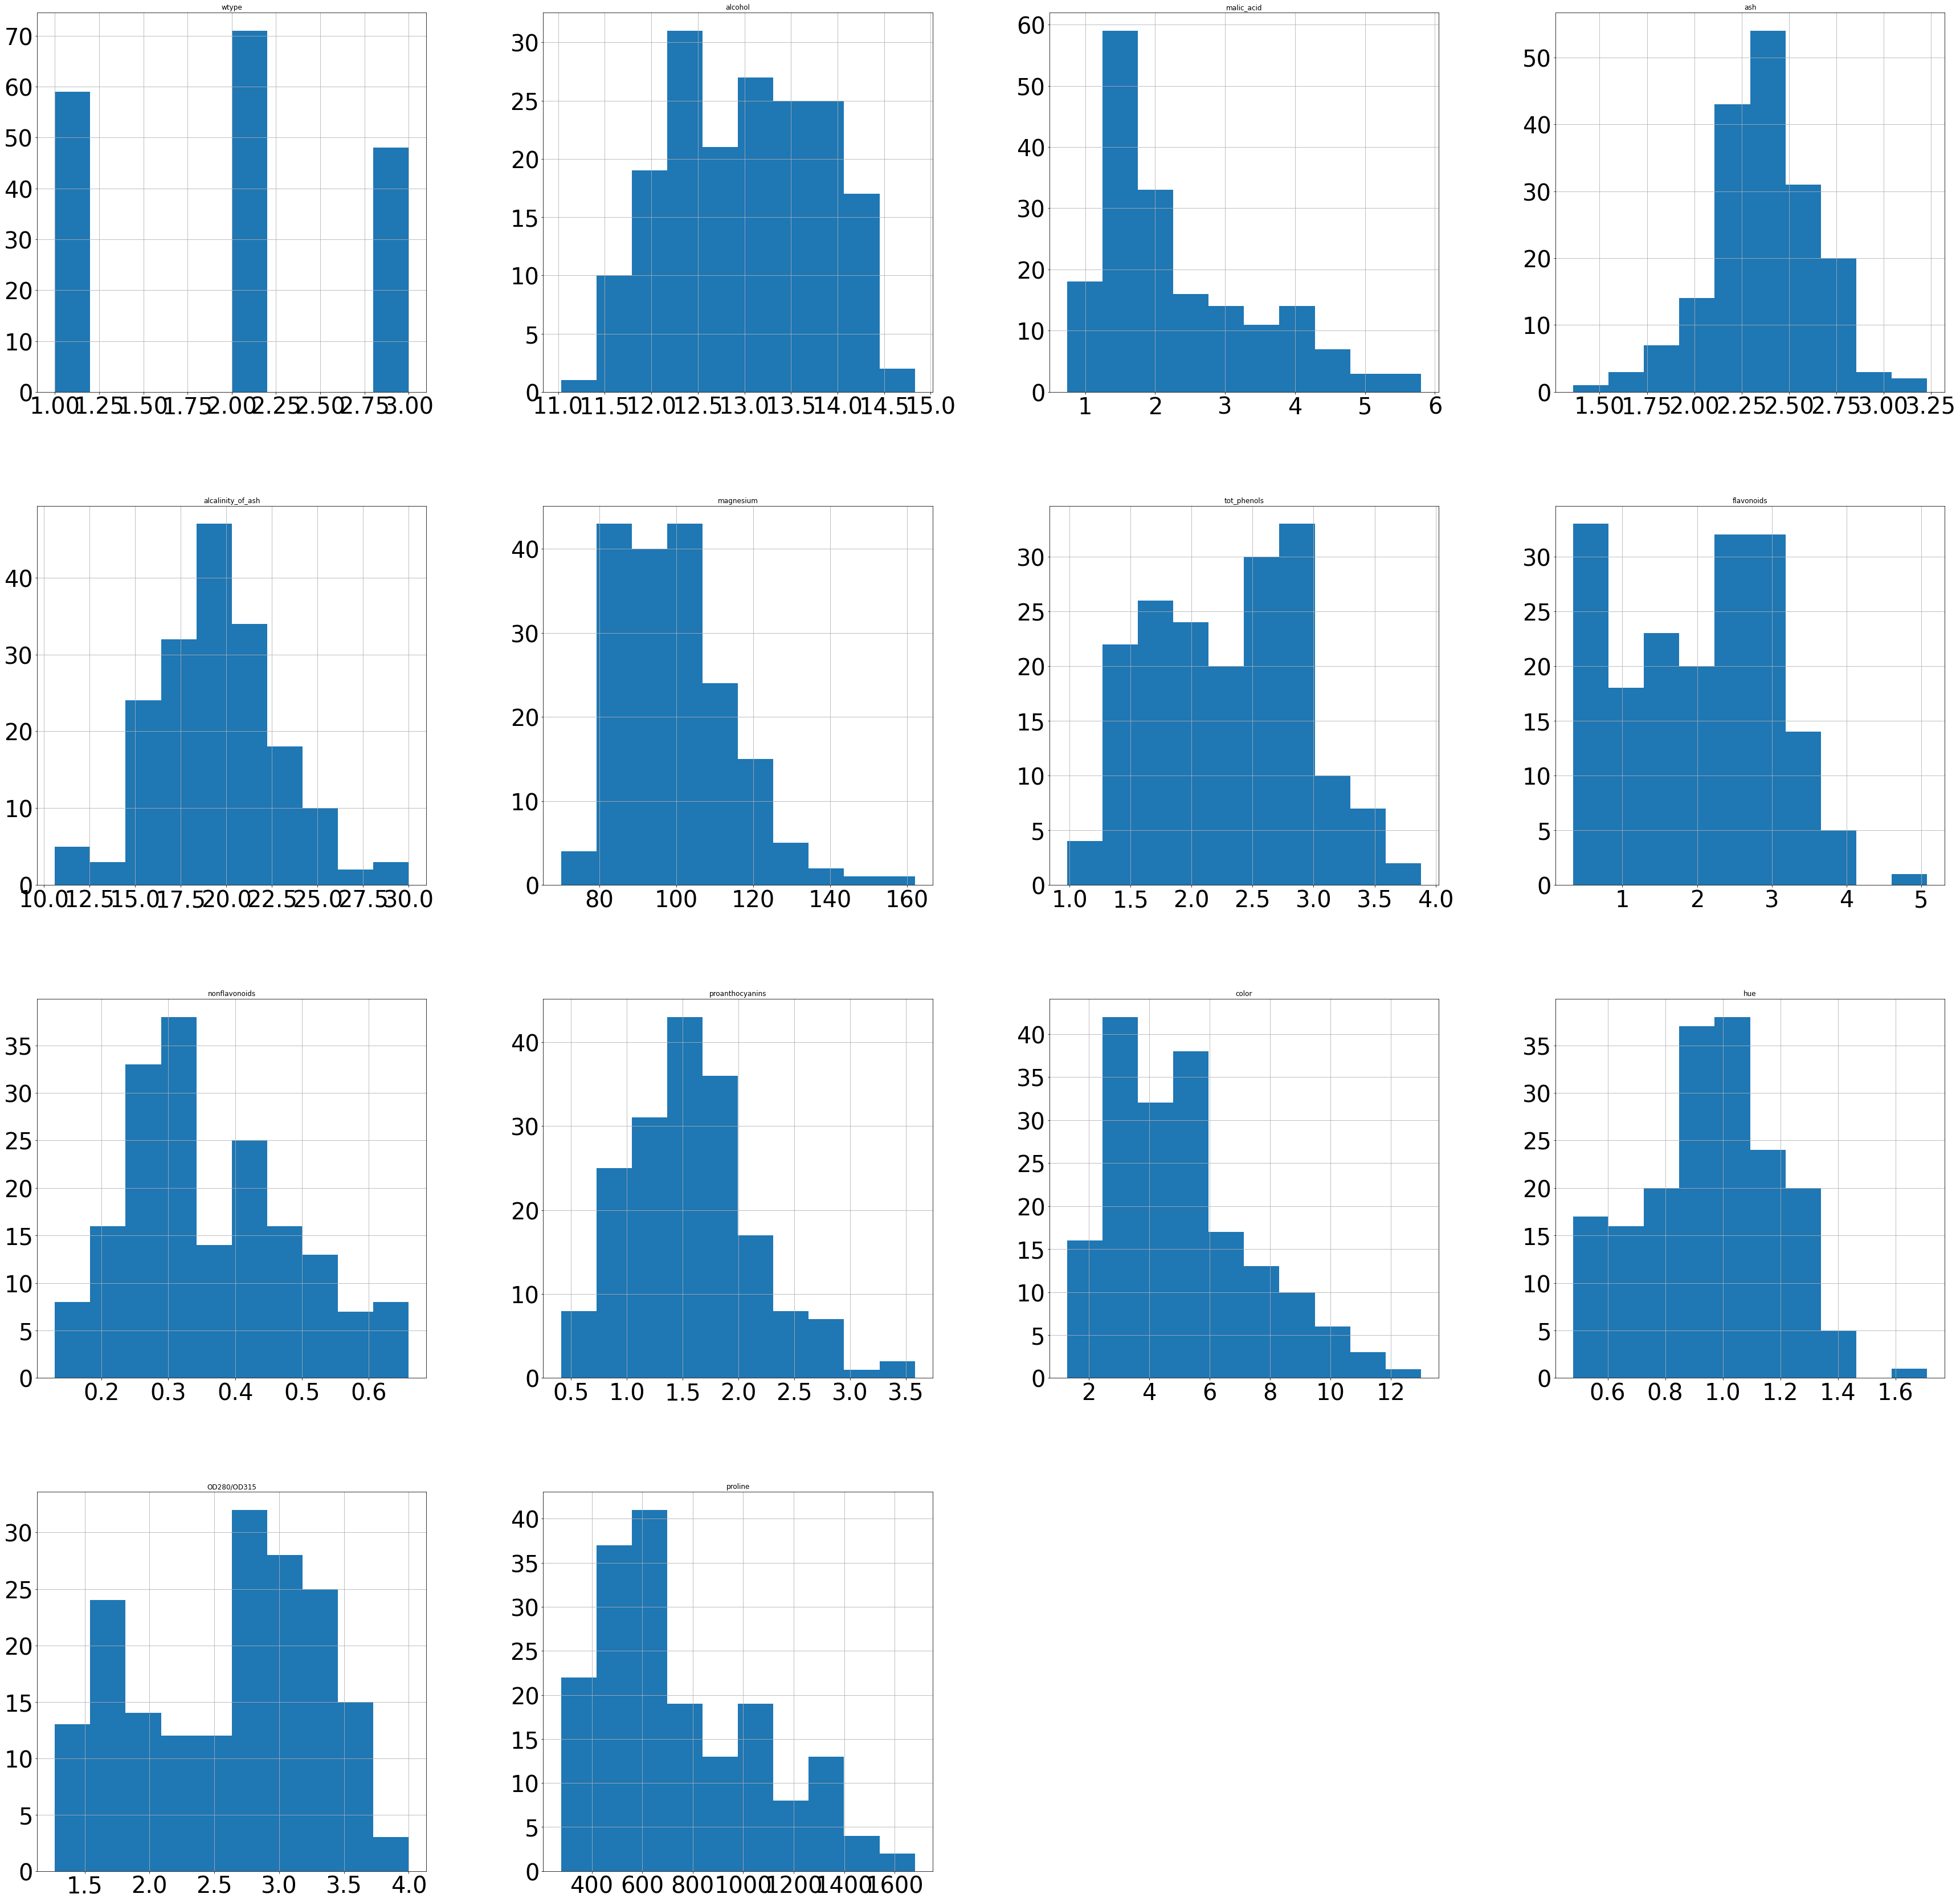

In [25]:
print("# histograms")
dataset.hist(figsize=(60,60),layout=(4,4), ylabelsize=40, xlabelsize=40)
plt.show()

*Notes on features distributions:*

- Some follow a normal-like distribution: alkalinity of ash and  ash.
- Some have a left skewed distribution: malic acid and color.
- Some are bimodals: flavonoids and magnesium.

# scatter matrix


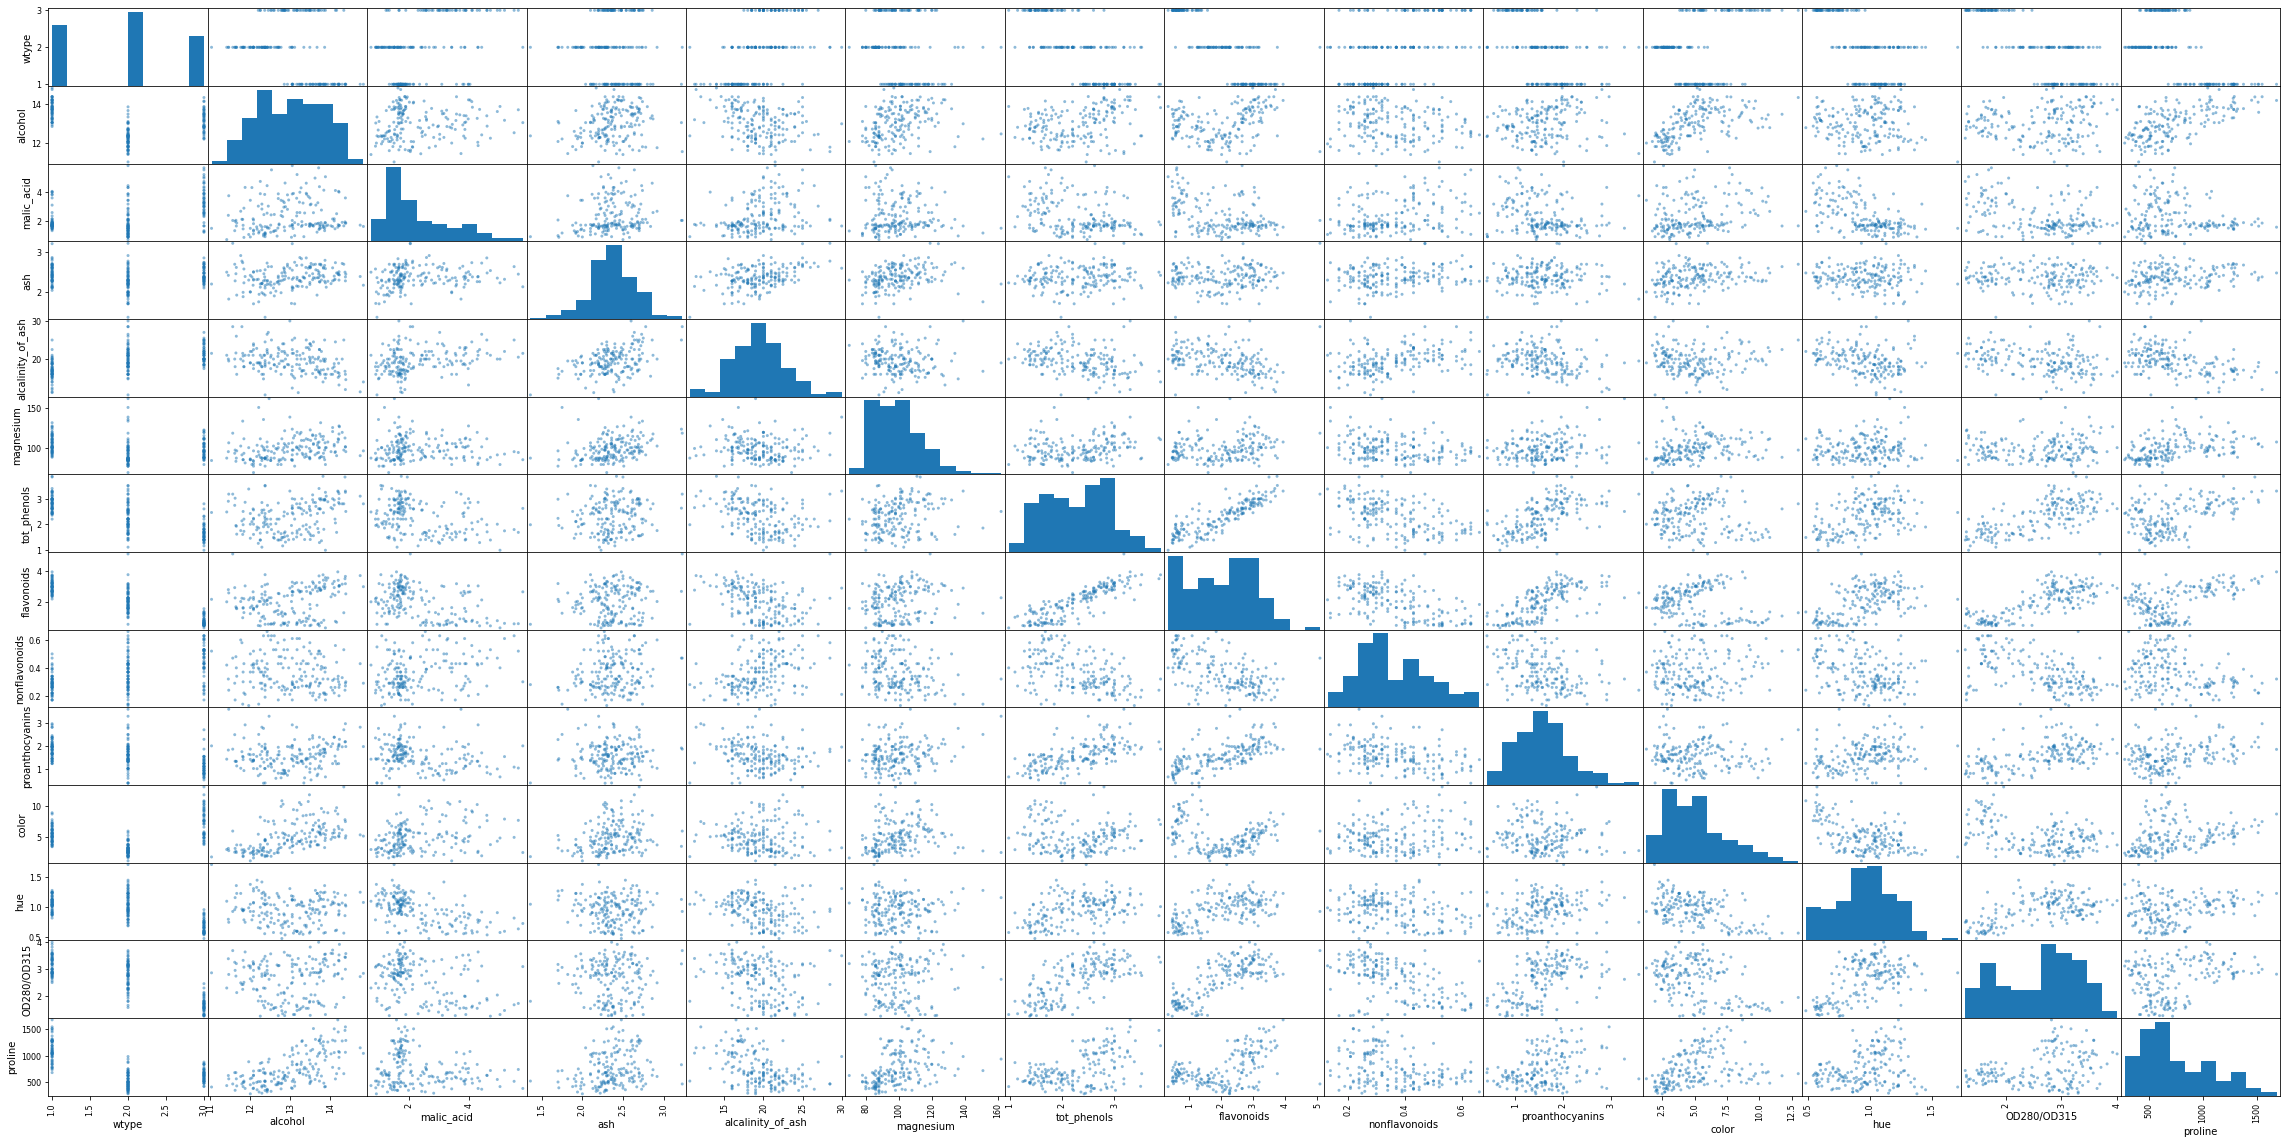

In [26]:
print("# scatter matrix")

scatter_matrix(dataset, figsize=(40,20))
plt.show()

# correlation matrix


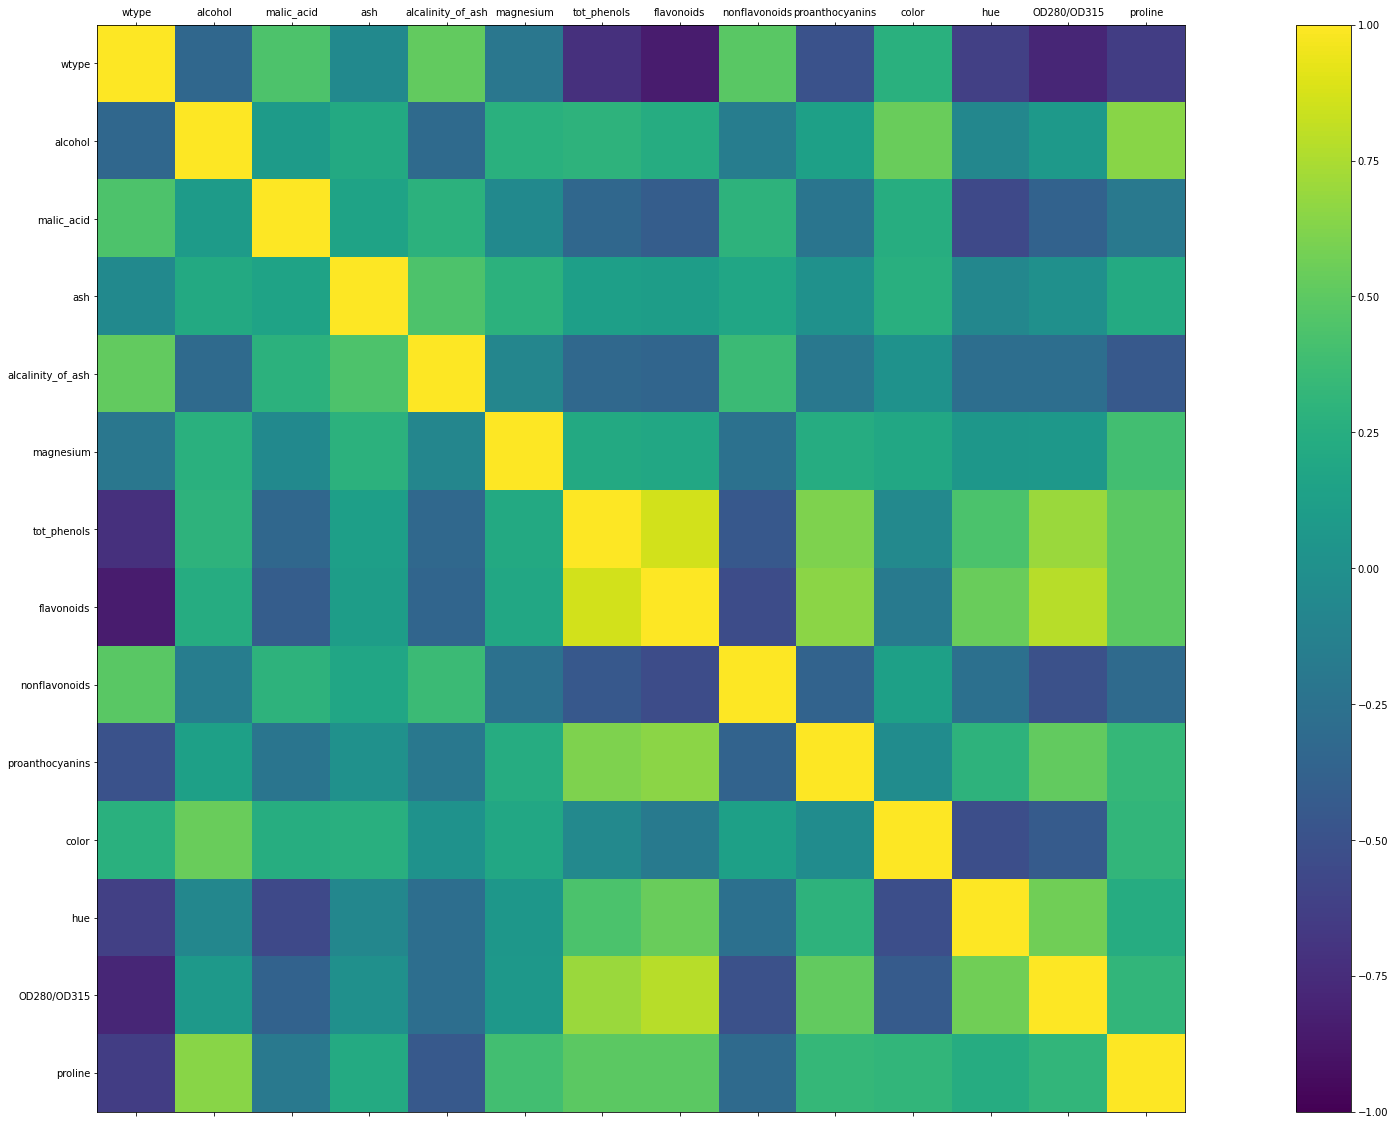

In [27]:
print("# correlation matrix")
fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

Interesting correlation between *flavonoids* and *tot_phenols*, but there is little surprise here since *flavonoids* are polyphenolic secondary metabolites found in plants.

In [28]:
# separate 20% of the dataset for validation
array = dataset.values
X = array[:,1:14]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [29]:
# find right baseline model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluation of the models
results =[]
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.943333 (0.062177)
LDA: 0.992857 (0.021429)
KNN: 0.726190 (0.076968)
CART: 0.865238 (0.067345)
NB: 0.971429 (0.034993)
SVM: 0.676667 (0.088152)


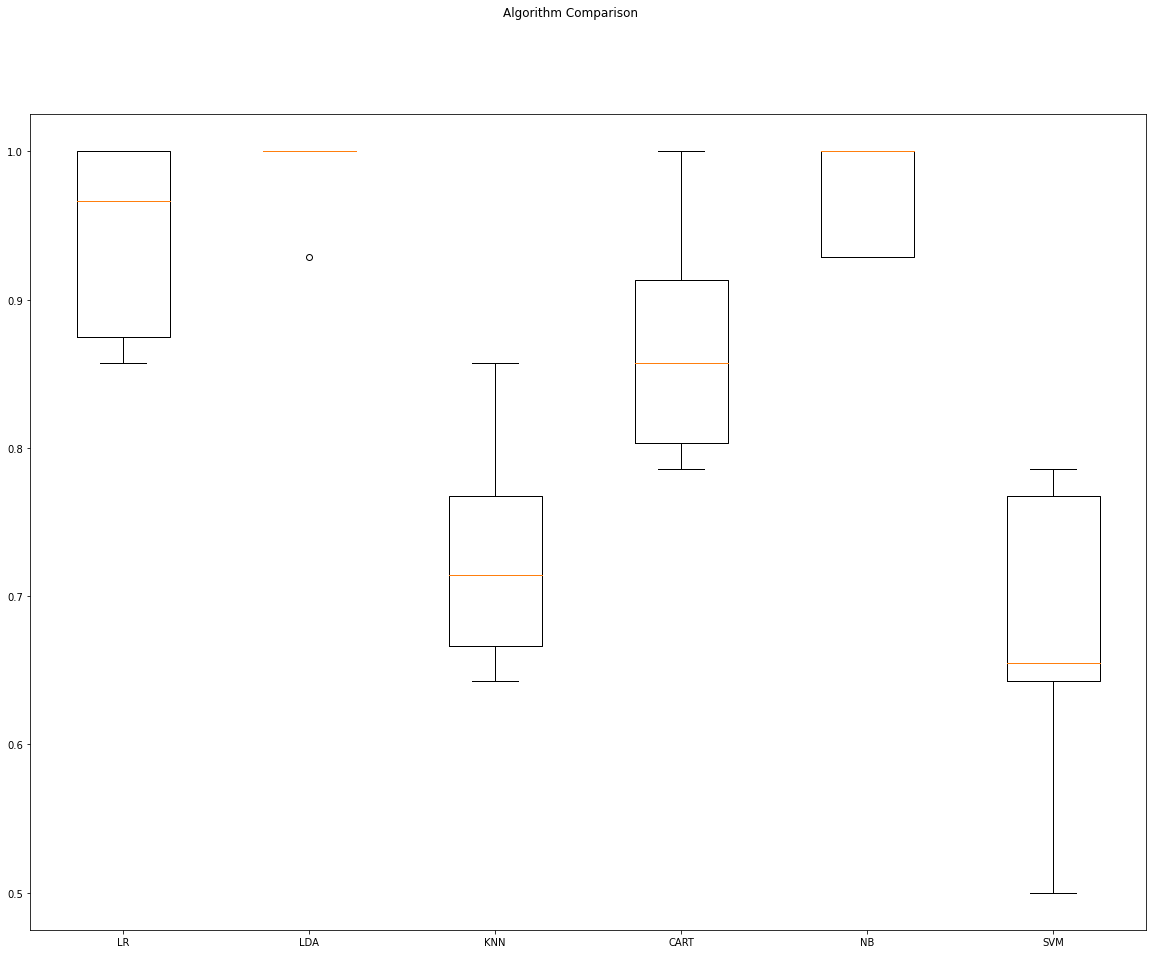

In [30]:
# Algorith comparison
fig = plt.figure(figsize=(20,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LDA seems to yield the best accuracy among the choosen classifiers, followed by a *Gaussian Naive Bayes*.

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)
print("# accuracy score")
print(accuracy_score(Y_test,predictions))
print("\n# confusion matrix")
print(confusion_matrix(Y_test,predictions))
print("\n# classification report")
print(classification_report(Y_test,predictions))

# accuracy score
0.9722222222222222

# confusion matrix
[[ 7  0  0]
 [ 0 16  1]
 [ 0  0 12]]

# classification report
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         7
         2.0       1.00      0.94      0.97        17
         3.0       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

